### Introduction
##### In this session, we will learn how to examine the natue of the WhereisRey conversation. We will also examine the content evolution (dynamically) in the ten-week period.¶

In [1]:
#!pip install matplotlib 
#!pip install wordcloud
#!pip install textblob

In [2]:
import pandas as pd 
import numpy as np
import re 
import string

#uncomment the next two lines if you do not have the stopwords list installed yet.
import nltk      
nltk.download('stopwords')
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from textblob import TextBlob

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\13193\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\13193\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
ReyPosts = pd.read_csv('WheresRey.csv', encoding="ISO-8859-1")
# to display the first few rows
ReyPosts.head()

,Week,Posts,PostsInWeek
0,1,Target exclusively released a StarWars toy s...,4
1,1,Hasbro Why do you always leave the girl charac...,4
2,1,Oh look they even included some women IN THE B...,4
3,1,osakadaioh1 damn serious. Disney sexist market...,4
4,2,TheMarySue Who is missing from this picture? ...,314


##### Define a text processing function
Since we will use text processing in many places, it is a good idea to write it as a user provided function. Then you can call it any time you need for your social media or text analytic projects.

In [4]:
def preprocess_text(text): 
    # get lowercase
    text = text.lower()
    # remove numbers
    text = re.sub(r'\d+', '', text)
    # remove urls
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text)
    # remove punctuation
    text = text.translate(text.maketrans('', '', string.punctuation))
    # strip whitespace
    text = text.strip()
    # remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    words = [w for w in tokens if not w in stop_words]
    text = " ".join(w for w in words)
    # stemming
    stemmer= PorterStemmer()
    tokens = word_tokenize(text)
    words = [stemmer.stem(w) for w in tokens]
    result = " ".join(w for w in words)
    return result

In [5]:
# combine all posts as one big text
posts = ReyPosts.Posts.values
text = " ".join(t for t in posts)
# preprocess text
processed_text = preprocess_text(text)

##### Drawing the word cloud

In [7]:
#pip install --upgrade pillow

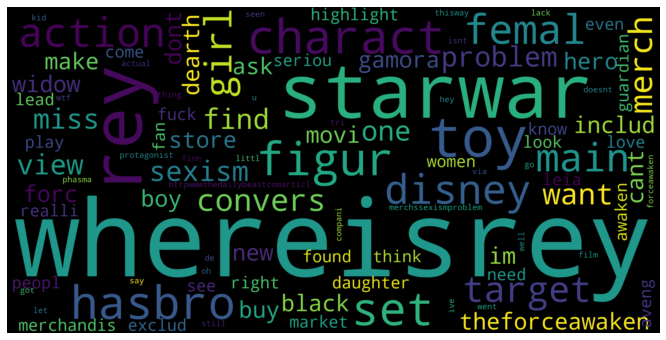

In [8]:
wordcloud = WordCloud( max_font_size=100, max_words=100, width = 400, height = 200, scale = 6, collocations=False).generate(processed_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##### More Controlled Word Cloud
You can change many parameters in WorlCloud such as font, max_words, and background_color, for details, refer https://github.com/amueller/word_cloud

You can also save the word cloud as a picture using "wordcloud.to_file("wordcloud.png")"

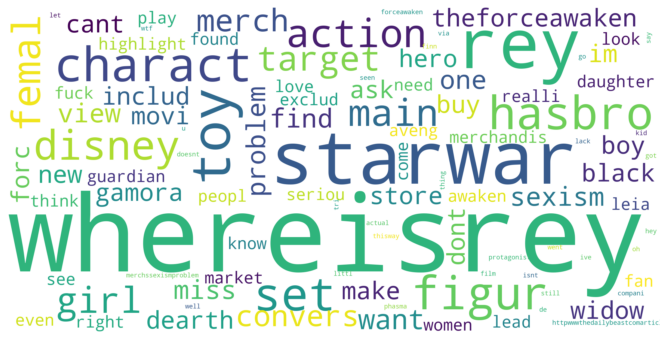

In [9]:
#  change a background color
wordcloud = WordCloud( max_font_size=100, max_words=100, width = 400, height = 200, background_color = 'white', scale = 6, collocations=False).generate(processed_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

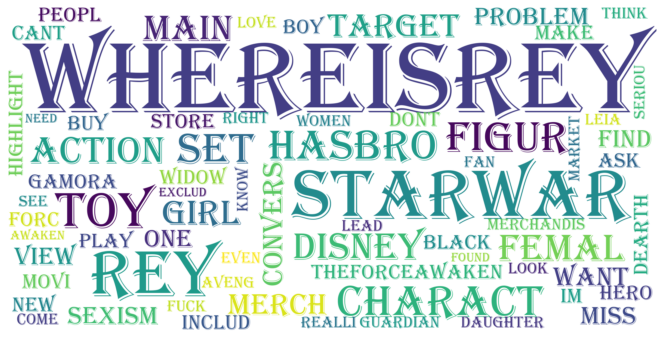

In [10]:
#  change a font
wordcloud = WordCloud(font_path= 'ALGER', max_font_size=100, max_words=100, width = 400, height = 200, 
                      background_color = 'white', scale = 6, collocations=False).generate(processed_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

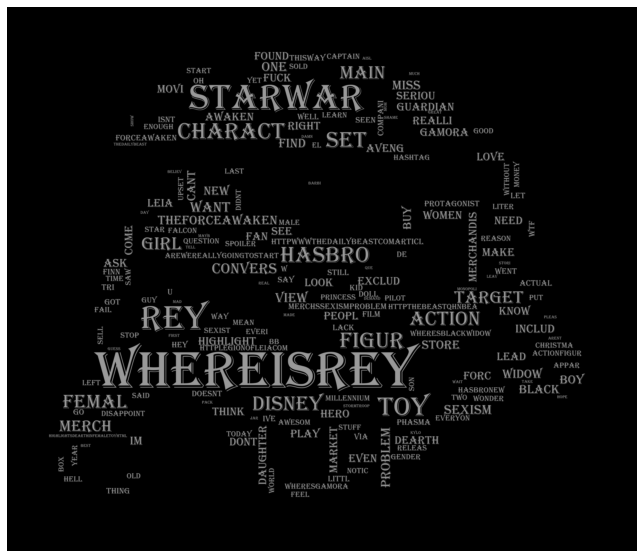

In [11]:
# or you can add a mask

# Function to create grey colors
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % 60

#read the mask image taken from
# https://raw.githubusercontent.com/dmofot/easy_wordclouds/master/stormtrooper_mask.png
mask = np.array(Image.open("stormtrooper_mask.png"))

wordcloud = WordCloud(font_path= 'ALGER',  mask=mask, max_font_size=100, max_words=200,
                      width = 800, height = 400, scale = 6, collocations=False).generate(processed_text)

# Store default colored image, recolor, and save
default_colors = wordcloud.to_array()
wordcloud.recolor(color_func=grey_color_func)
#wordcloud.to_file("stormtrooper_wc.png")

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### How did Sentiment Change Over Time?
##### To answer this question, we first obtain the sentiment polarity measures using textblob package.

In [12]:
# process posts into a new column
ReyPosts['processed_post'] = [preprocess_text(post) for post in ReyPosts['Posts'].values]

In [13]:
def get_sentiment(post): 
    blob = TextBlob(post) 
    return blob.sentiment

The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [15]:
# get sentiment and append into dataframe
polarity = []
subjectivity = []
for post in ReyPosts['processed_post']:
    polar = get_sentiment(post).polarity
    polarity.append(polar)
    subjec = get_sentiment(post).subjectivity
    subjectivity.append(subjec)
    
ReyPosts['polarity'] = polarity
ReyPosts['subjectivity'] = subjectivity

In [16]:
ReyPosts.head()

,Week,Posts,PostsInWeek,processed_post,polarity,subjectivity
0,1,Target exclusively released a StarWars toy s...,4,target exclus releas starwar toy set zero fema...,0.000000,0.000000
1,1,Hasbro Why do you always leave the girl charac...,4,hasbro alway leav girl charact toy pack seriou...,-0.333333,0.666667
2,1,Oh look they even included some women IN THE B...,4,oh look even includ women background starwar b...,0.000000,0.000000
3,1,osakadaioh1 damn serious. Disney sexist market...,4,osakadaioh damn seriou disney sexist market al...,0.000000,0.000000
4,2,TheMarySue Who is missing from this picture? ...,314,themarysu miss pictur starwar theforceawaken w...,0.000000,0.000000


We can visualize any of the metrics. For example, the statement below graphs the polarity metric across the weeks

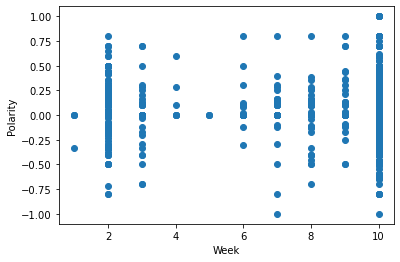

In [17]:
plt.scatter('Week', 'polarity', data=ReyPosts)
plt.xlabel('Week')
plt.ylabel('Polarity')
plt.show()

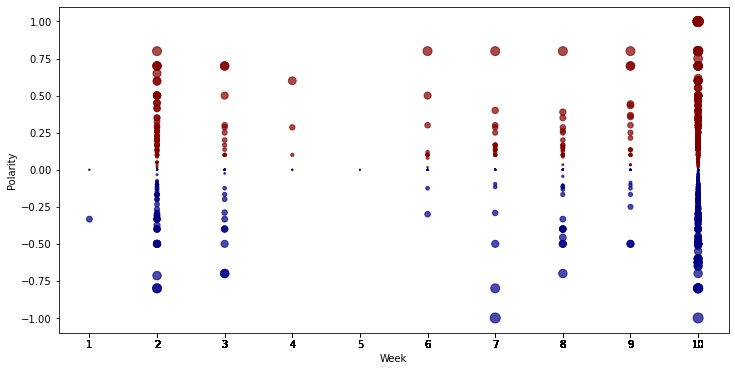

In [18]:
t = [1 if p >0 else 0 for p in ReyPosts['polarity']]
s = [abs(p)*100+1 for p in ReyPosts['polarity']]
plt.figure(figsize=(12, 6))
plt.scatter('Week', 'polarity', data=ReyPosts, c = t, s = s, alpha=0.7, cmap='jet')
plt.xticks(ReyPosts['Week'])
plt.xlabel('Week')
plt.ylabel('Polarity')
plt.show()
